<h1 align='center' style='color:purple'><b>Decision Trees - Part 2</b></h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Post pruning decision trees with cost complexity pruning

The class:DecisionTreeClassifier provides parameters such as min_samples_leaf and max_depth to prevent a tree from overfiting. Cost complexity pruning provides another option to control the size of a tree. In class:DecisionTreeClassifier, this pruning technique is parameterized by the cost complexity parameter, ccp_alpha. Greater values of ccp_alpha increase the number of nodes pruned. Here we only show the effect of ccp_alpha on regularizing the trees and how to choose a ccp_alpha based on validation scores.

See also minimal_cost_complexity_pruning for details on pruning.

<b>Import Breast Cancer Dataset</b>

In [8]:
from sklearn.datasets import load_breast_cancer

<b>Extract Inputs & Target variables then split the Data into Training & Testing Data</b>

In [ ]:
X, y = load_breast_cancer(return_X_y=True)

# Split the data into Training and Testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

<b> Import Decision Tree Classifier</b>

In [ ]:
from sklearn.tree import DecisionTreeClassifier

<b>DecisionTree model training</b>

In [9]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

<b> Make Prediction for Testing Data and check model Accuracy</b>

In [10]:
pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
print('Model Accuracy :',round(accuracy_score(y_test, pred),3))

0.8811188811188811

<b>Visualize the Trained Decision Tree Model</b>

[Text(1092.75, 1283.5, 'X[7] <= 0.049\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(697.5, 1132.5, 'X[23] <= 952.9\ngini = 0.095\nsamples = 260\nvalue = [13, 247]'),
 Text(465.0, 981.5, 'X[13] <= 42.19\ngini = 0.054\nsamples = 252\nvalue = [7, 245]'),
 Text(279.0, 830.5, 'X[25] <= 0.454\ngini = 0.032\nsamples = 247\nvalue = [4, 243]'),
 Text(186.0, 679.5, 'X[21] <= 30.145\ngini = 0.024\nsamples = 246\nvalue = [3, 243]'),
 Text(93.0, 528.5, 'gini = 0.0\nsamples = 215\nvalue = [0, 215]'),
 Text(279.0, 528.5, 'X[14] <= 0.004\ngini = 0.175\nsamples = 31\nvalue = [3, 28]'),
 Text(186.0, 377.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(372.0, 377.5, 'X[1] <= 23.2\ngini = 0.067\nsamples = 29\nvalue = [1, 28]'),
 Text(279.0, 226.5, 'X[1] <= 22.385\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(186.0, 75.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(372.0, 75.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(465.0, 226.5, 'gini = 0.0\nsamples = 24\nvalue = [0, 

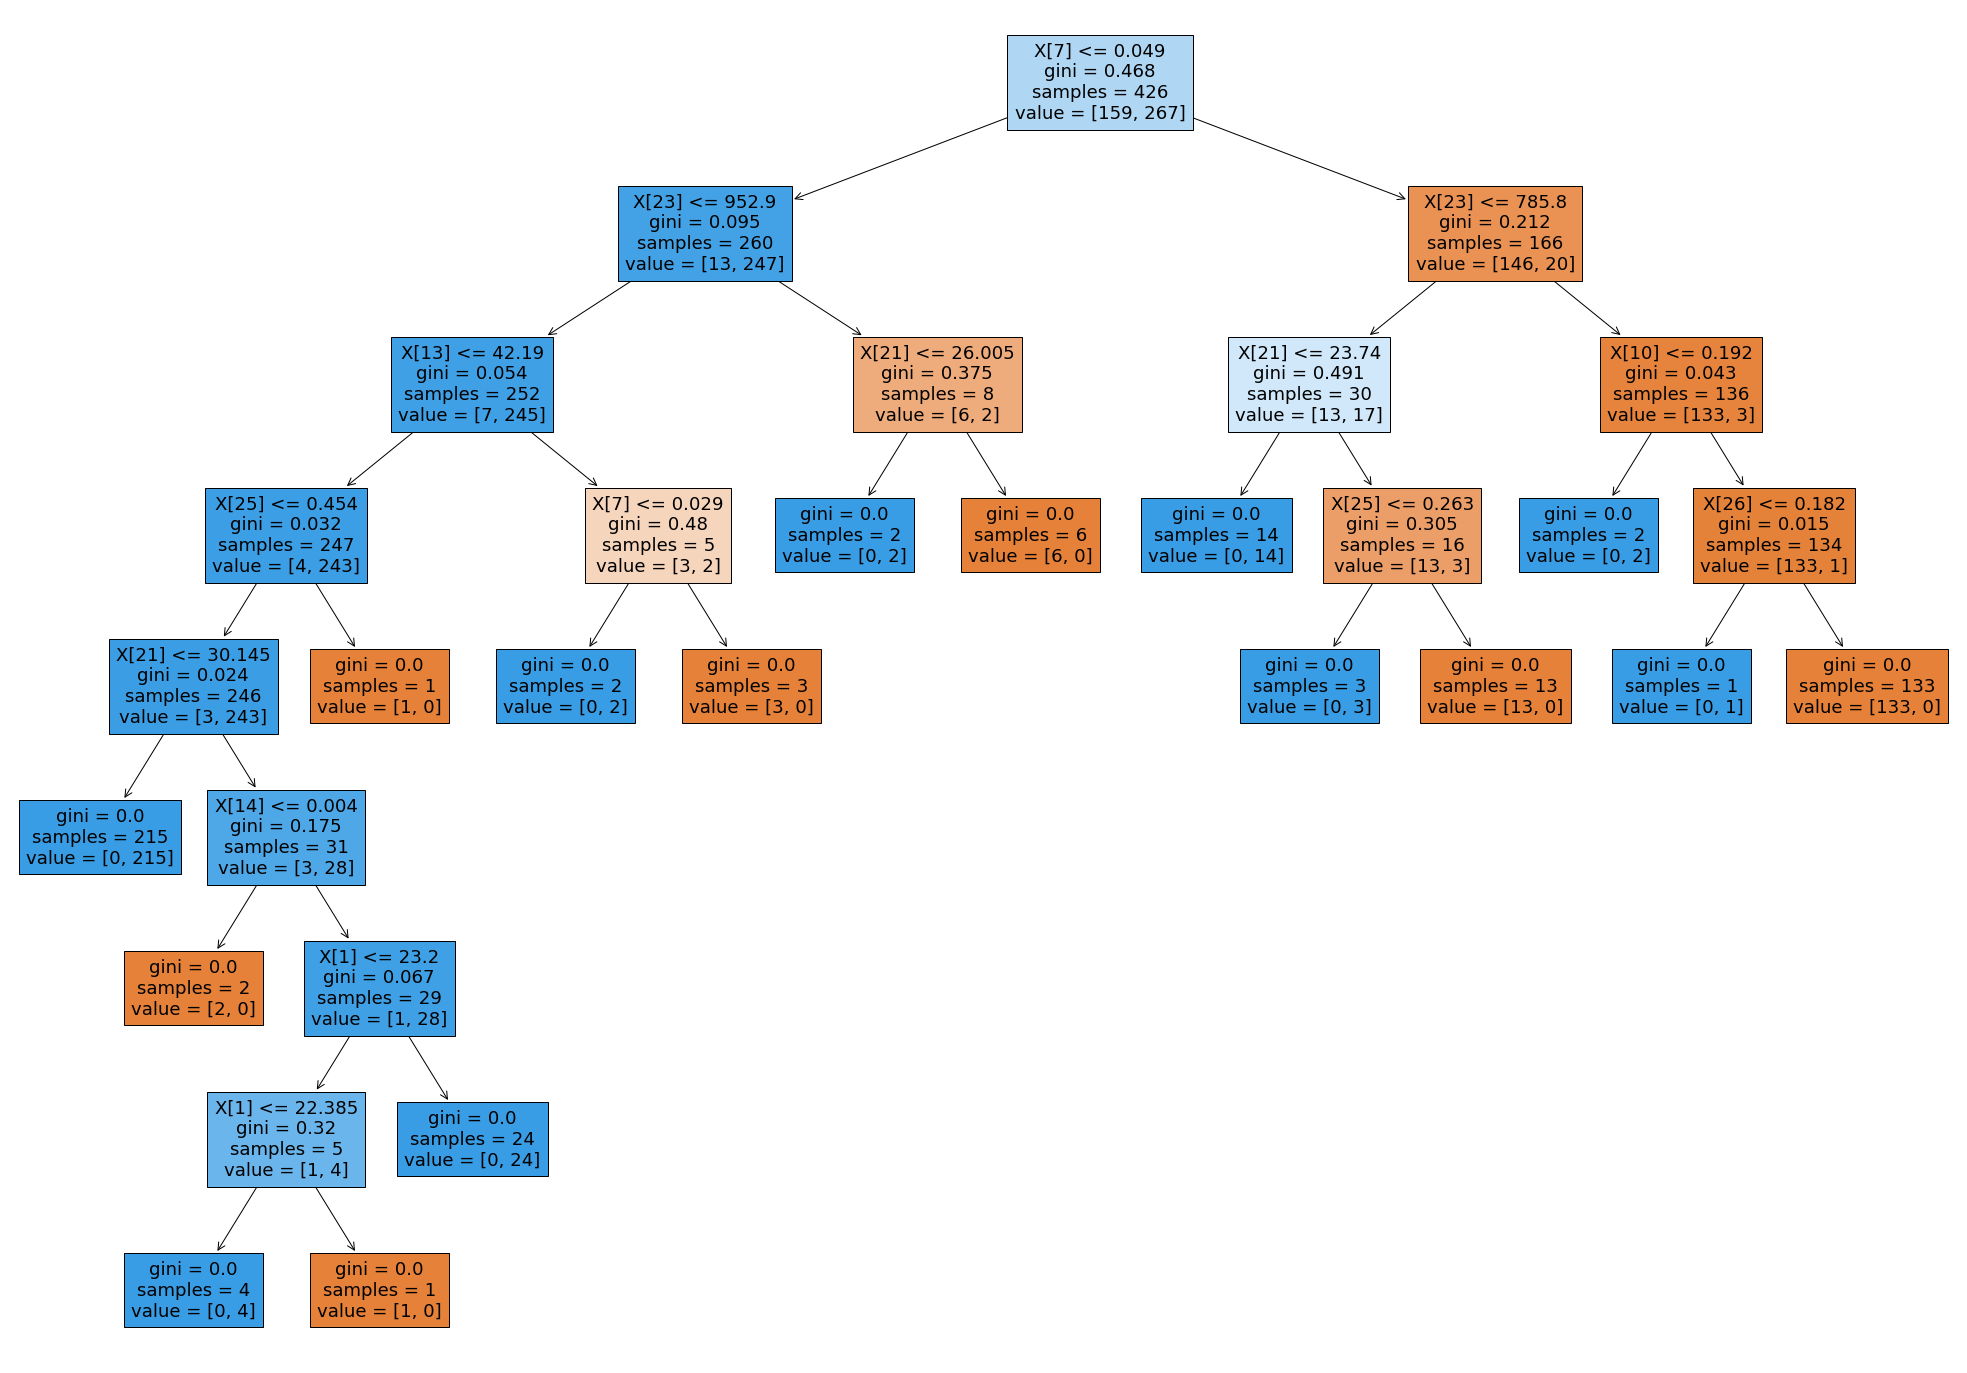

In [12]:
from sklearn import tree
plt.figure(figsize=(35,25))
tree.plot_tree(clf,filled=True)

[<b> Minimal Cost-Complexity Pruning</b>](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html)  
Minimal cost-complexity pruning is an algorithm used to prune a tree to avoid over-fitting. This pruning technique is parameterized by the cost complexity parameter, ccp_alpha. Greater values of ccp_alpha increase the number of nodes pruned.  
ccp_alpha : (non-negative float, default=0.0)
Complexity parameter used for Minimal Cost-Complexity Pruning. The subtree with the largest cost complexity that is smaller than ccp_alpha will be chosen. By default, no pruning is performed. 

In [13]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

<b> Obtained Values of ccp_alpha</b>

In [20]:
ccp_alphas

array([0.        , 0.00226647, 0.00464743, 0.0046598 , 0.0056338 ,
       0.00704225, 0.00784194, 0.00911402, 0.01144366, 0.018988  ,
       0.02314163, 0.03422475, 0.32729844])

<b>For each value of ccp_alpha, train a DecisionTree model and store it in models.</b>

In [21]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.3272984419327777


For the remainder of this example, we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node. Here we show that the number of nodes and tree depth decreases as alpha increases.

## Accuracy vs alpha for training and testing sets

When ccp_alpha is set to zero and keeping the other default parameters of class:DecisionTreeClassifier, the tree overfits, leading to a 100% training accuracy and 88% testing accuracy. As alpha increases, more of the tree is pruned, thus creating a decision tree that generalizes better. In this example, setting ccp_alpha=0.015 maximizes the testing accuracy.

In [ ]:
# For all the models trained for different values of ccp_alpha, find training and testing accuracy and plot it.
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

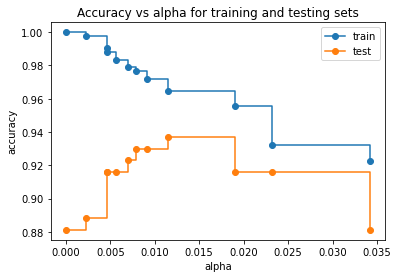

<b> Train Final Decision tree model with the selected value of ccp_alpha.</b>

In [22]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.015)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.015, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [23]:
pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
print('Model Accuracy after Pruning :', round(accuracy_score(y_test, pred),3))

0.9370629370629371

<b> Visualize the final DecisonTree model to observe the effect of post-pruning. </b>

[Text(418.5, 475.65000000000003, 'X[7] <= 0.049\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(209.25, 339.75, 'X[23] <= 952.9\ngini = 0.095\nsamples = 260\nvalue = [13, 247]'),
 Text(104.625, 203.85000000000002, 'gini = 0.054\nsamples = 252\nvalue = [7, 245]'),
 Text(313.875, 203.85000000000002, 'gini = 0.375\nsamples = 8\nvalue = [6, 2]'),
 Text(627.75, 339.75, 'X[23] <= 785.8\ngini = 0.212\nsamples = 166\nvalue = [146, 20]'),
 Text(523.125, 203.85000000000002, 'X[21] <= 23.74\ngini = 0.491\nsamples = 30\nvalue = [13, 17]'),
 Text(418.5, 67.94999999999999, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(627.75, 67.94999999999999, 'gini = 0.305\nsamples = 16\nvalue = [13, 3]'),
 Text(732.375, 203.85000000000002, 'gini = 0.043\nsamples = 136\nvalue = [133, 3]')]

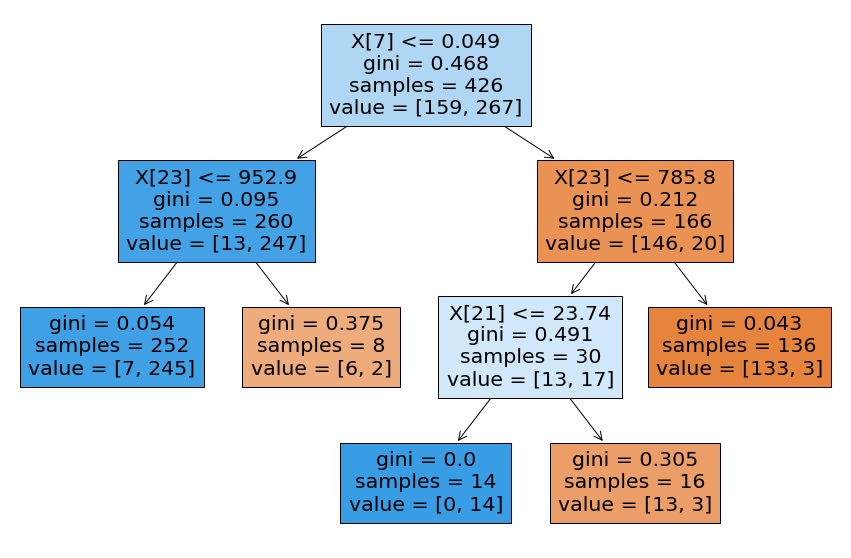

In [24]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)